# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Centralized import of all packages:
import scipy as sp # I like sipy better than numpy
import pandas as pd
import cv2

import pickle

import matplotlib.pylab as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [2]:
EPOCHS = 500
BATCH_SIZE = 1024

In [3]:
# (done) TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
validation_file= "data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# (done) TODO: Number of training examples
n_train = len(X_train)

# (done) TODO: Number of validation examples
n_validation = len(X_valid)

# (done) TODO: Number of testing examples.
n_test = len(X_test)

# (done) TODO: What's the shape of an traffic sign image?
image_shape = X_test[0,...].shape

# (done) TODO: How many unique classes/labels there are in the dataset.
n_classes = len(sp.unique(y_train))

# extra: load description of numerical values:
df_names = pd.read_csv('signnames.csv')

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [5]:
df_names

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
df_names.loc[5]

ClassId                        5
SignName    Speed limit (80km/h)
Name: 5, dtype: object

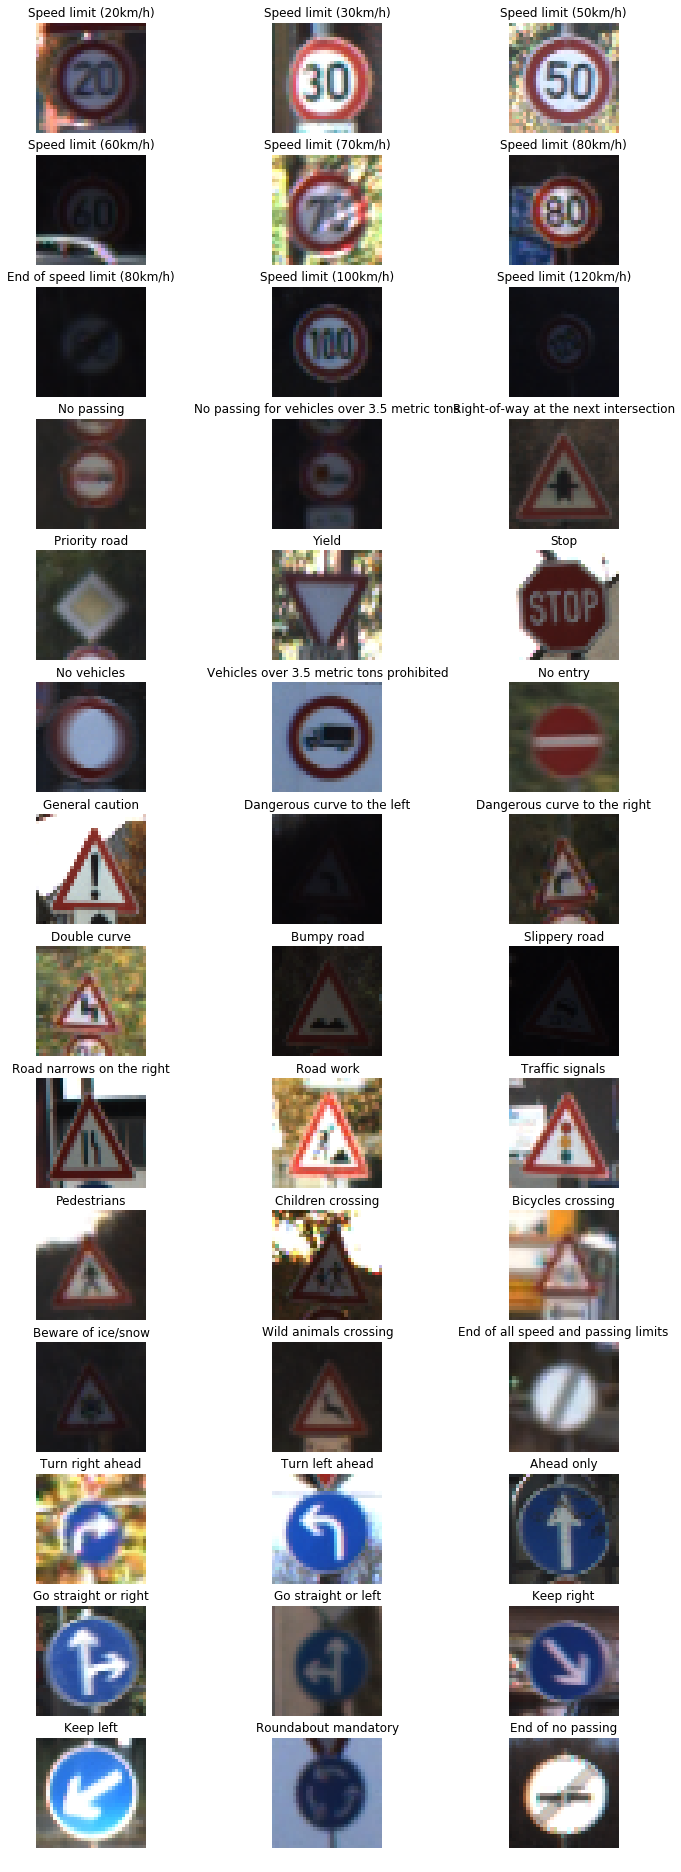

In [7]:
plt.figure(figsize=(12,36))
for i in range(1,43):
    plt.subplot(15,3,i)
    plt.imshow(X_test[y_test==i-1][0,...])
    plt.title(df_names.loc[i-1]['SignName'])
    plt.axis('off')

plt.savefig('examples/fig01_example_signs.png',bbox_inches='tight', pad_inches=0)

(array([ 180., 1980., 2010., 1260., 1770., 1650.,  360., 1290., 1260.,
        1320., 1800., 1170., 1890., 1920.,  690.,  540.,  360.,  990.,
        1080.,  180.,  300.,  270.,  330.,  450.,  240., 1350.,  540.,
         210.,  480.,  240.,  390.,  690.,  210.,  599.,  360., 1080.,
         330.,  180., 1860.,  270.,  300.,  420.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42.]),
 <a list of 42 Patch objects>)

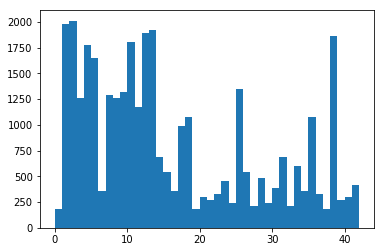

In [8]:
plt.figure()
plt.hist(y_train,bins = 42)

plt.xlabel('Classes')
plt.ylabel('Number of Occurances')
plt.title("Histogram of Trainingset (Classes)")

plt.savefig('examples/fig02_train_hist_class.png',bbox_inches='tight', pad_inches=0)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [10]:
def normalize(data):
    tmp = data.copy()
    return tmp / 255 - 0.5

def grayscale(data):
    # Taking the mean of the color channels is not correct, as the weighting of the color channels is not even,
    # However it will do for this exercise
    tmp = data.copy()
    return sp.sum(tmp/3,axis=3,keepdims=True)
    
def pipeline(data, norm=True, gray=False):
    tmp = data.copy()
    if gray:
        tmp = grayscale(tmp)
    if norm:
        tmp = normalize(tmp)
        
    return tmp

In [11]:
# Shuffle test data
X_train, y_train = shuffle(X_train, y_train)
# Data housekeeping:
X_train_orig = X_train.copy()
y_train_orig = y_train.copy()

X_valid_orig = X_valid.copy()
y_valid_orig = y_valid.copy()

X_test_orig = X_test.copy()
y_test_orig = y_test.copy()

In [12]:
# Create normalized, grayscaled images
x_train={'normalized':pipeline(X_train),
         'gray':pipeline(X_train,gray=True)}
x_test = {'normalized':pipeline(X_test),
          'gray':pipeline(X_test,gray=True)}
x_valid = {'normalized':pipeline(X_valid),
           'gray':pipeline(X_valid,gray=True)}


In [13]:
X_train[...].max()

255

In [14]:
print(f"Original:   (Mean, sigma) ({X_train.mean()}, {X_train.std()}")
print(f"Normalized: (Mean, sigma) ({x_train['normalized'].mean()}, {x_train['normalized'].std()}")
print(f"Graycale:   (Mean, sigma) ({x_train['normalized'].mean()}, {x_train['normalized'].std()}")

Original:   (Mean, sigma) (82.6775890369964, 67.85088842633222
Normalized: (Mean, sigma) (-0.1757741606392302, 0.26608191539738185
Graycale:   (Mean, sigma) (-0.1757741606392302, 0.26608191539738185


Showing image of a Stop sign


Text(0.5, 1.0, 'Histogram (all)')

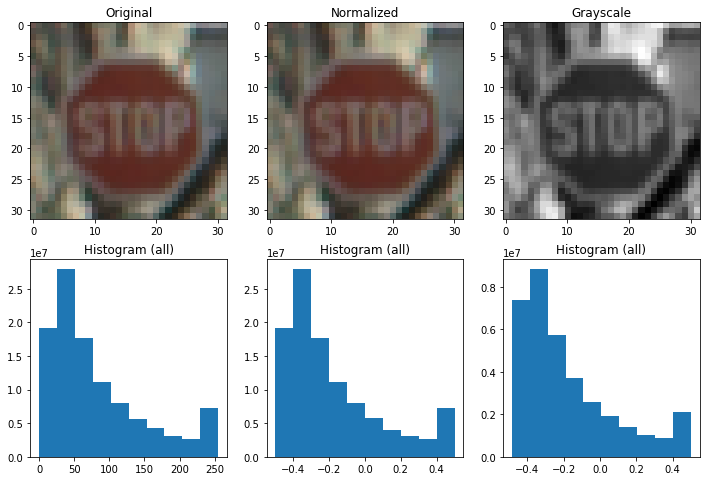

In [15]:
print("Showing image of a " + df_names.loc[y_train[0]]['SignName'] + " sign")
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.imshow(X_train[0,...])
plt.title('Original')

plt.subplot(2,3,2)
plt.imshow(x_train['normalized'][0,...]+0.5)
plt.title('Normalized')

plt.subplot(2,3,3)
plt.imshow(x_train['gray'][0,:,:,0]+0.5,cmap='gray')
plt.title('Grayscale')

plt.subplot(2,3,4)
plt.hist(X_train.flatten())
plt.title('Histogram (all)')

plt.subplot(2,3,5)
plt.hist(x_train['normalized'].flatten())
plt.title('Histogram (all)')

plt.subplot(2,3,6)
plt.hist(x_train['gray'].flatten())
plt.title('Histogram (all)')

plt.savefig('examples/fig03_train_pipeline.png',bbox_inches='tight', pad_inches=0)

### Model Architecture

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [17]:
def LeNet(x, dim=3 ,mu=0.0, sigma=0.1):
    ''' Lenet implementation
    
    Taken from Udacitycourse: Lesson 14.36ff.
    
    Args:
        x (tensorflow): Tensorflow model
        dim (int): 1 or 3 (grayscale or color), default: 3 (rgb)
        mu (float): mean value of initial guess
        sigma (float): std of initial guess
        
    '''
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    
    # ------------------------------------------------------------
    # Layer 1: Convolutional. Input = 32x32xdim. Output = 28x28x6.
    # ------------------------------------------------------------
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, dim, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation 1 - RELU
    conv1 = tf.nn.relu(conv1)

    # Pooling 1 - Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution1')
    
    print(f"Layer 1 shape: {conv1.get_shape()}")
    
    # ------------------------------------------------------------
    #Layer 2: Convolutional. Output = 10x10x16.
    # ------------------------------------------------------------
    
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation 2
    conv2 = tf.nn.relu(conv2)

    # Pooling 2 - Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution2')
    
    print(f"Layer 2 shape: {conv2.get_shape()}")
    
    # ------------------------------------------------------------
    # Flatten 2 - Input = 5x5x16. Output = 400.
    # ------------------------------------------------------------
    
    fc0   = flatten(conv2)
    print(f"Flatten  shape: {fc0.get_shape()}")
    
    # ------------------------------------------------------------
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    # ------------------------------------------------------------
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation - 3.
    fc1    = tf.nn.relu(fc1)
    print(f"Fully Connected 1: {fc1.get_shape()}")
    
    # ------------------------------------------------------------
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    # ------------------------------------------------------------
    
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation 4
    fc2    = tf.nn.relu(fc2)
    
    print(f"Fully Connected 2: {fc2.get_shape()}")
    
    # ------------------------------------------------------------
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    # ------------------------------------------------------------
    
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    print(f"Output Layer: {logits.get_shape()}")
    return logits


In [18]:
def SermaNet(x, mu=0.0, sigma=0.1, dim=3):
    ''' Adapted from Sermanet/LeCunn traffic sign classification journal article
    
    Taken from Udacitycourse: Lesson 14.36ff.
    
    Args:
        x (tensorflow): Tensorflow model
        dim (int): 1 or 3 (grayscale or color), default: 3 (rgb)
        mu (float): mean value of initial guess
        sigma (float): std of initial guess
        
    '''
    
    # ------------------------------------------------------------
    # Layer 1: Convolutional. Input = 32x32xdim. Output = 28x28x6.
    # ------------------------------------------------------------
    
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, dim, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1, name='conv01')
    print("Layer 1 shape (conv01):",x.get_shape())

    # Activation.
    x = tf.nn.relu(x,name='conv01_act')
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID',name='conv01_act_pool')
    layer1 = x
    
    # ------------------------------------------------------------
    #Layer 2: Convolutional. Output = 10x10x16.
    # ------------------------------------------------------------
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2, name='conv02')
    print("Layer 2 shape (conv02):",x.get_shape())                 
    # Activation.
    x = tf.nn.relu(x,name='conv02_act')

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID',name="conv02_act_pool")
    layer2 = x
    
    # ------------------------------------------------------------
    # Layer 3: Convolutional. Output = 1x1x400.
    # ------------------------------------------------------------
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3, name='conv03')
    print("Layer 3 shape (conv03):",x.get_shape())   
                     
    # Activation.
    x = tf.nn.relu(x,name='conv03_act')
    layer3 = x
    
    # ------------------------------------------------------------
    # Flatten layer 2 and layer 3 and combine flattened layers
    # ------------------------------------------------------------
    
    # Flatten - Layer 2: Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten Layer 3 (x): Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    #x = tf.concat_v2([xflat, layer2flat], 1)
    x = tf.concat([xflat, layer2flat], 1)
    print("Concatenated Layer:",x.get_shape())
    
    # ------------------------------------------------------------
    # Dropout
    # ------------------------------------------------------------
    
    x = tf.nn.dropout(x, keep_prob)
    
    # ------------------------------------------------------------
    # Layer 4: Fully Connected. Input = 800. Output = 43.
    # ------------------------------------------------------------
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    print("Output Layer Size (Logits): ",logits.get_shape())
    return logits

print('done')

done


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [19]:
res_validation = {}
res_testing = {}

In [20]:
x3 = tf.placeholder(tf.float32, (None, 32, 32, 3))
x1 = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

x3_final_test = tf.placeholder(tf.float32, (None, 32, 32, 3))
x1_final_test = tf.placeholder(tf.float32, (None, 32, 32, 1))

x3_final_graph = tf.placeholder(tf.float32, (None, 32, 32, 3))
x1_final_graph = tf.placeholder(tf.float32, (None, 32, 32, 1))

one_hot_y = tf.one_hot(y, n_classes)

#### Lenet / RGB Data

In [21]:
# --------------------------------------------
# Input Data Peparation
# --------------------------------------------

# Shuffle test data
X_train, y_train = shuffle(X_train_orig, y_train_orig)
X_train = pipeline(X_train)

X_valid = pipeline(X_valid_orig)
y_valid = y_valid_orig.copy()

X_test = pipeline(X_test_orig)
y_test = y_test_orig.copy()


# --------------------------------------------
# Data Placeholders
# --------------------------------------------

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
x_final_test = tf.placeholder(tf.float32, (None, 32, 32, 3))
x_final_graph = tf.placeholder(tf.float32, (None, 32, 32, 3))
one_hot_y = tf.one_hot(y, n_classes)


# --------------------------------------------
# Training Pipeline 
# --------------------------------------------

rate = 0.001

logits = LeNet(x,dim=3)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# --------------------------------------------
# Model Evaluation
# --------------------------------------------

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



Layer 1 shape: (?, 14, 14, 6)
Layer 2 shape: (?, 5, 5, 16)
Flatten  shape: (?, 400)
Fully Connected 1: (?, 120)
Fully Connected 2: (?, 84)
Output Layer: (?, 43)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [22]:
print("="*60)
print("= Training")
print("="*60)

res_testing["LeNet-RGB"] = []
res_validation["LeNet-RGB"] = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        res_validation["LeNet-RGB"].append(validation_accuracy)
        print("EPOCH {} ... Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
        
    saver.save(sess, './lenet-rgb')
    print("Model saved")
    
print("="*60)
print("= Testing")
print("="*60)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet-rgb.meta')
    saver2.restore(sess, "./lenet-rgb")
    test_accuracy = evaluate(X_test, y_test)
    res_testing["LeNet-RGB"].append(test_accuracy)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

= Training
EPOCH 1 ... Validation Accuracy = 0.237
EPOCH 2 ... Validation Accuracy = 0.471
EPOCH 3 ... Validation Accuracy = 0.652
EPOCH 4 ... Validation Accuracy = 0.699
EPOCH 5 ... Validation Accuracy = 0.775
EPOCH 6 ... Validation Accuracy = 0.802
EPOCH 7 ... Validation Accuracy = 0.821
EPOCH 8 ... Validation Accuracy = 0.832
EPOCH 9 ... Validation Accuracy = 0.838
EPOCH 10 ... Validation Accuracy = 0.867
EPOCH 11 ... Validation Accuracy = 0.849
EPOCH 12 ... Validation Accuracy = 0.868
EPOCH 13 ... Validation Accuracy = 0.872
EPOCH 14 ... Validation Accuracy = 0.869
EPOCH 15 ... Validation Accuracy = 0.881
EPOCH 16 ... Validation Accuracy = 0.877
EPOCH 17 ... Validation Accuracy = 0.876
EPOCH 18 ... Validation Accuracy = 0.884
EPOCH 19 ... Validation Accuracy = 0.888
EPOCH 20 ... Validation Accuracy = 0.884
EPOCH 21 ... Validation Accuracy = 0.885
EPOCH 22 ... Validation Accuracy = 0.892
EPOCH 23 ... Validation Accuracy = 0.894
EPOCH 24 ... Validation Accuracy = 0.890
EPOCH 25 ... V

EPOCH 196 ... Validation Accuracy = 0.929
EPOCH 197 ... Validation Accuracy = 0.929
EPOCH 198 ... Validation Accuracy = 0.928
EPOCH 199 ... Validation Accuracy = 0.929
EPOCH 200 ... Validation Accuracy = 0.928
EPOCH 201 ... Validation Accuracy = 0.927
EPOCH 202 ... Validation Accuracy = 0.927
EPOCH 203 ... Validation Accuracy = 0.926
EPOCH 204 ... Validation Accuracy = 0.927
EPOCH 205 ... Validation Accuracy = 0.927
EPOCH 206 ... Validation Accuracy = 0.927
EPOCH 207 ... Validation Accuracy = 0.926
EPOCH 208 ... Validation Accuracy = 0.925
EPOCH 209 ... Validation Accuracy = 0.927
EPOCH 210 ... Validation Accuracy = 0.927
EPOCH 211 ... Validation Accuracy = 0.927
EPOCH 212 ... Validation Accuracy = 0.926
EPOCH 213 ... Validation Accuracy = 0.926
EPOCH 214 ... Validation Accuracy = 0.927
EPOCH 215 ... Validation Accuracy = 0.926
EPOCH 216 ... Validation Accuracy = 0.926
EPOCH 217 ... Validation Accuracy = 0.927
EPOCH 218 ... Validation Accuracy = 0.926
EPOCH 219 ... Validation Accuracy 

EPOCH 392 ... Validation Accuracy = 0.921
EPOCH 393 ... Validation Accuracy = 0.920
EPOCH 394 ... Validation Accuracy = 0.922
EPOCH 395 ... Validation Accuracy = 0.922
EPOCH 396 ... Validation Accuracy = 0.920
EPOCH 397 ... Validation Accuracy = 0.923
EPOCH 398 ... Validation Accuracy = 0.922
EPOCH 399 ... Validation Accuracy = 0.922
EPOCH 400 ... Validation Accuracy = 0.920
EPOCH 401 ... Validation Accuracy = 0.922
EPOCH 402 ... Validation Accuracy = 0.920
EPOCH 403 ... Validation Accuracy = 0.922
EPOCH 404 ... Validation Accuracy = 0.922
EPOCH 405 ... Validation Accuracy = 0.920
EPOCH 406 ... Validation Accuracy = 0.921
EPOCH 407 ... Validation Accuracy = 0.920
EPOCH 408 ... Validation Accuracy = 0.921
EPOCH 409 ... Validation Accuracy = 0.920
EPOCH 410 ... Validation Accuracy = 0.922
EPOCH 411 ... Validation Accuracy = 0.921
EPOCH 412 ... Validation Accuracy = 0.921
EPOCH 413 ... Validation Accuracy = 0.920
EPOCH 414 ... Validation Accuracy = 0.921
EPOCH 415 ... Validation Accuracy 

#### Lenet - Grayscale

In [23]:
tf.reset_default_graph()

In [24]:
# --------------------------------------------
# Input Data Peparation
# --------------------------------------------

# Shuffle test data
X_train, y_train = shuffle(X_train_orig, y_train_orig)
X_train = pipeline(X_train,gray=True)

X_valid = pipeline(X_valid_orig,gray=True)
y_valid = y_valid_orig.copy()

X_test = pipeline(X_test_orig,gray=True)
y_test = y_test_orig.copy()


# --------------------------------------------
# Data Placeholders
# --------------------------------------------

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
x_final_test = tf.placeholder(tf.float32, (None, 32, 32, 1))
x_final_graph = tf.placeholder(tf.float32, (None, 32, 32, 1))
one_hot_y = tf.one_hot(y, n_classes)


# --------------------------------------------
# Training Pipeline 
# --------------------------------------------

rate = 0.001

logits = LeNet(x,dim=1)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# --------------------------------------------
# Model Evaluation
# --------------------------------------------

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



Layer 1 shape: (?, 14, 14, 6)
Layer 2 shape: (?, 5, 5, 16)
Flatten  shape: (?, 400)
Fully Connected 1: (?, 120)
Fully Connected 2: (?, 84)
Output Layer: (?, 43)


In [25]:
print("="*60)
print("= Training")
print("="*60)

res_testing["LeNet-Gray"] = []
res_validation["LeNet-Gray"] = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        res_validation["LeNet-Gray"].append(validation_accuracy)
        print("EPOCH {} ... Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
        
    saver.save(sess, './lenet-gray')
    print("Model saved")
    
print("="*60)
print("= Testing")
print("="*60)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet-gray.meta')
    saver2.restore(sess, "./lenet-gray")
    test_accuracy = evaluate(X_test, y_test)
    res_testing["LeNet-Gray"].append(test_accuracy)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

= Training
EPOCH 1 ... Validation Accuracy = 0.118
EPOCH 2 ... Validation Accuracy = 0.254
EPOCH 3 ... Validation Accuracy = 0.482
EPOCH 4 ... Validation Accuracy = 0.659
EPOCH 5 ... Validation Accuracy = 0.755
EPOCH 6 ... Validation Accuracy = 0.781
EPOCH 7 ... Validation Accuracy = 0.790
EPOCH 8 ... Validation Accuracy = 0.816
EPOCH 9 ... Validation Accuracy = 0.820
EPOCH 10 ... Validation Accuracy = 0.833
EPOCH 11 ... Validation Accuracy = 0.845
EPOCH 12 ... Validation Accuracy = 0.856
EPOCH 13 ... Validation Accuracy = 0.867
EPOCH 14 ... Validation Accuracy = 0.872
EPOCH 15 ... Validation Accuracy = 0.865
EPOCH 16 ... Validation Accuracy = 0.865
EPOCH 17 ... Validation Accuracy = 0.873
EPOCH 18 ... Validation Accuracy = 0.878
EPOCH 19 ... Validation Accuracy = 0.881
EPOCH 20 ... Validation Accuracy = 0.877
EPOCH 21 ... Validation Accuracy = 0.879
EPOCH 22 ... Validation Accuracy = 0.888
EPOCH 23 ... Validation Accuracy = 0.893
EPOCH 24 ... Validation Accuracy = 0.887
EPOCH 25 ... V

EPOCH 196 ... Validation Accuracy = 0.927
EPOCH 197 ... Validation Accuracy = 0.924
EPOCH 198 ... Validation Accuracy = 0.927
EPOCH 199 ... Validation Accuracy = 0.925
EPOCH 200 ... Validation Accuracy = 0.926
EPOCH 201 ... Validation Accuracy = 0.924
EPOCH 202 ... Validation Accuracy = 0.924
EPOCH 203 ... Validation Accuracy = 0.924
EPOCH 204 ... Validation Accuracy = 0.924
EPOCH 205 ... Validation Accuracy = 0.922
EPOCH 206 ... Validation Accuracy = 0.923
EPOCH 207 ... Validation Accuracy = 0.922
EPOCH 208 ... Validation Accuracy = 0.924
EPOCH 209 ... Validation Accuracy = 0.924
EPOCH 210 ... Validation Accuracy = 0.925
EPOCH 211 ... Validation Accuracy = 0.923
EPOCH 212 ... Validation Accuracy = 0.923
EPOCH 213 ... Validation Accuracy = 0.924
EPOCH 214 ... Validation Accuracy = 0.923
EPOCH 215 ... Validation Accuracy = 0.924
EPOCH 216 ... Validation Accuracy = 0.923
EPOCH 217 ... Validation Accuracy = 0.923
EPOCH 218 ... Validation Accuracy = 0.924
EPOCH 219 ... Validation Accuracy 

EPOCH 392 ... Validation Accuracy = 0.915
EPOCH 393 ... Validation Accuracy = 0.917
EPOCH 394 ... Validation Accuracy = 0.916
EPOCH 395 ... Validation Accuracy = 0.916
EPOCH 396 ... Validation Accuracy = 0.915
EPOCH 397 ... Validation Accuracy = 0.917
EPOCH 398 ... Validation Accuracy = 0.917
EPOCH 399 ... Validation Accuracy = 0.916
EPOCH 400 ... Validation Accuracy = 0.915
EPOCH 401 ... Validation Accuracy = 0.918
EPOCH 402 ... Validation Accuracy = 0.916
EPOCH 403 ... Validation Accuracy = 0.916
EPOCH 404 ... Validation Accuracy = 0.916
EPOCH 405 ... Validation Accuracy = 0.916
EPOCH 406 ... Validation Accuracy = 0.918
EPOCH 407 ... Validation Accuracy = 0.916
EPOCH 408 ... Validation Accuracy = 0.915
EPOCH 409 ... Validation Accuracy = 0.916
EPOCH 410 ... Validation Accuracy = 0.915
EPOCH 411 ... Validation Accuracy = 0.916
EPOCH 412 ... Validation Accuracy = 0.916
EPOCH 413 ... Validation Accuracy = 0.916
EPOCH 414 ... Validation Accuracy = 0.915
EPOCH 415 ... Validation Accuracy 

#### SermaNet - Color

In [26]:
tf.reset_default_graph()

# --------------------------------------------
# Input Data Peparation
# --------------------------------------------

# Shuffle test data
X_train, y_train = shuffle(X_train_orig, y_train_orig)
X_train = pipeline(X_train,gray=False)

X_valid = pipeline(X_valid_orig,gray=False)
y_valid = y_valid_orig.copy()

X_test = pipeline(X_test_orig,gray=False)
y_test = y_test_orig.copy()


# --------------------------------------------
# Data Placeholders
# --------------------------------------------

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

x_final_test = tf.placeholder(tf.float32, (None, 32, 32, 3))
x_final_graph = tf.placeholder(tf.float32, (None, 32, 32, 3))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

# --------------------------------------------
# Training Pipeline 
# --------------------------------------------

rate = 0.001

logits = SermaNet(x,dim=3)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# --------------------------------------------
# Model Evaluation
# --------------------------------------------

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Layer 1 shape (conv01): (?, 28, 28, 6)
Layer 2 shape (conv02): (?, 10, 10, 16)
Layer 3 shape (conv03): (?, 1, 1, 400)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
Concatenated Layer: (?, 800)
Output Layer Size (Logits):  (?, 43)


In [27]:
print("="*60)
print("= Training")
print("="*60)

res_testing["SermaNet-RGB"] = []
res_validation["SermaNet-RGB"] = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        res_validation["SermaNet-RGB"].append(validation_accuracy)
        print("EPOCH {} ... Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
        
    saver.save(sess, './sermanet-rgb')
    print("Model saved")
    
print("="*60)
print("= Testing")
print("="*60)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./sermanet-rgb.meta')
    saver2.restore(sess, "./sermanet-rgb")
    test_accuracy = evaluate(X_test, y_test)
    res_testing["SermaNet-RGB"].append(test_accuracy)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

= Training
EPOCH 1 ... Validation Accuracy = 0.355
EPOCH 2 ... Validation Accuracy = 0.618
EPOCH 3 ... Validation Accuracy = 0.748
EPOCH 4 ... Validation Accuracy = 0.807
EPOCH 5 ... Validation Accuracy = 0.841
EPOCH 6 ... Validation Accuracy = 0.857
EPOCH 7 ... Validation Accuracy = 0.868
EPOCH 8 ... Validation Accuracy = 0.882
EPOCH 9 ... Validation Accuracy = 0.894
EPOCH 10 ... Validation Accuracy = 0.891
EPOCH 11 ... Validation Accuracy = 0.906
EPOCH 12 ... Validation Accuracy = 0.916
EPOCH 13 ... Validation Accuracy = 0.912
EPOCH 14 ... Validation Accuracy = 0.920
EPOCH 15 ... Validation Accuracy = 0.916
EPOCH 16 ... Validation Accuracy = 0.930
EPOCH 17 ... Validation Accuracy = 0.926
EPOCH 18 ... Validation Accuracy = 0.933
EPOCH 19 ... Validation Accuracy = 0.933
EPOCH 20 ... Validation Accuracy = 0.932
EPOCH 21 ... Validation Accuracy = 0.930
EPOCH 22 ... Validation Accuracy = 0.933
EPOCH 23 ... Validation Accuracy = 0.937
EPOCH 24 ... Validation Accuracy = 0.937
EPOCH 25 ... V

EPOCH 196 ... Validation Accuracy = 0.956
EPOCH 197 ... Validation Accuracy = 0.959
EPOCH 198 ... Validation Accuracy = 0.951
EPOCH 199 ... Validation Accuracy = 0.961
EPOCH 200 ... Validation Accuracy = 0.961
EPOCH 201 ... Validation Accuracy = 0.959
EPOCH 202 ... Validation Accuracy = 0.953
EPOCH 203 ... Validation Accuracy = 0.952
EPOCH 204 ... Validation Accuracy = 0.955
EPOCH 205 ... Validation Accuracy = 0.956
EPOCH 206 ... Validation Accuracy = 0.954
EPOCH 207 ... Validation Accuracy = 0.952
EPOCH 208 ... Validation Accuracy = 0.956
EPOCH 209 ... Validation Accuracy = 0.960
EPOCH 210 ... Validation Accuracy = 0.957
EPOCH 211 ... Validation Accuracy = 0.959
EPOCH 212 ... Validation Accuracy = 0.962
EPOCH 213 ... Validation Accuracy = 0.954
EPOCH 214 ... Validation Accuracy = 0.960
EPOCH 215 ... Validation Accuracy = 0.958
EPOCH 216 ... Validation Accuracy = 0.960
EPOCH 217 ... Validation Accuracy = 0.957
EPOCH 218 ... Validation Accuracy = 0.960
EPOCH 219 ... Validation Accuracy 

EPOCH 392 ... Validation Accuracy = 0.954
EPOCH 393 ... Validation Accuracy = 0.960
EPOCH 394 ... Validation Accuracy = 0.956
EPOCH 395 ... Validation Accuracy = 0.961
EPOCH 396 ... Validation Accuracy = 0.966
EPOCH 397 ... Validation Accuracy = 0.965
EPOCH 398 ... Validation Accuracy = 0.964
EPOCH 399 ... Validation Accuracy = 0.963
EPOCH 400 ... Validation Accuracy = 0.967
EPOCH 401 ... Validation Accuracy = 0.965
EPOCH 402 ... Validation Accuracy = 0.958
EPOCH 403 ... Validation Accuracy = 0.962
EPOCH 404 ... Validation Accuracy = 0.962
EPOCH 405 ... Validation Accuracy = 0.961
EPOCH 406 ... Validation Accuracy = 0.961
EPOCH 407 ... Validation Accuracy = 0.956
EPOCH 408 ... Validation Accuracy = 0.951
EPOCH 409 ... Validation Accuracy = 0.952
EPOCH 410 ... Validation Accuracy = 0.954
EPOCH 411 ... Validation Accuracy = 0.959
EPOCH 412 ... Validation Accuracy = 0.951
EPOCH 413 ... Validation Accuracy = 0.949
EPOCH 414 ... Validation Accuracy = 0.955
EPOCH 415 ... Validation Accuracy 

#### SermaNet - Grayscale

In [28]:
tf.reset_default_graph()

# --------------------------------------------
# Input Data Peparation
# --------------------------------------------

# Shuffle test data
X_train, y_train = shuffle(X_train_orig, y_train_orig)
X_train = pipeline(X_train,gray=True)

X_valid = pipeline(X_valid_orig,gray=True)
y_valid = y_valid_orig.copy()

X_test = pipeline(X_test_orig,gray=True)
y_test = y_test_orig.copy()


# --------------------------------------------
# Data Placeholders
# --------------------------------------------

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

x_final_test = tf.placeholder(tf.float32, (None, 32, 32, 1))
x_final_graph = tf.placeholder(tf.float32, (None, 32, 32, 1))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

# --------------------------------------------
# Training Pipeline 
# --------------------------------------------

rate = 0.001

logits = SermaNet(x,dim=1)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# --------------------------------------------
# Model Evaluation
# --------------------------------------------

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Layer 1 shape (conv01): (?, 28, 28, 6)
Layer 2 shape (conv02): (?, 10, 10, 16)
Layer 3 shape (conv03): (?, 1, 1, 400)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
Concatenated Layer: (?, 800)
Output Layer Size (Logits):  (?, 43)


In [29]:
print("="*60)
print("= Training")
print("="*60)

res_testing["SermaNet-Gray"] = []
res_validation["SermaNet-Gray"] = []


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        res_validation["SermaNet-Gray"].append(validation_accuracy)
        print("EPOCH {} ... Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
        
    saver.save(sess, './sermanet-gray')
    print("Model saved")
    
print("="*60)
print("= Testing")
print("="*60)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./sermanet-gray.meta')
    saver2.restore(sess, "./sermanet-gray")
    test_accuracy = evaluate(X_test, y_test)
    res_testing["SermaNet-Gray"].append(test_accuracy)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

= Training
EPOCH 1 ... Validation Accuracy = 0.044
EPOCH 2 ... Validation Accuracy = 0.088
EPOCH 3 ... Validation Accuracy = 0.131
EPOCH 4 ... Validation Accuracy = 0.153
EPOCH 5 ... Validation Accuracy = 0.191
EPOCH 6 ... Validation Accuracy = 0.243
EPOCH 7 ... Validation Accuracy = 0.284
EPOCH 8 ... Validation Accuracy = 0.309
EPOCH 9 ... Validation Accuracy = 0.348
EPOCH 10 ... Validation Accuracy = 0.386
EPOCH 11 ... Validation Accuracy = 0.440
EPOCH 12 ... Validation Accuracy = 0.460
EPOCH 13 ... Validation Accuracy = 0.491
EPOCH 14 ... Validation Accuracy = 0.524
EPOCH 15 ... Validation Accuracy = 0.559
EPOCH 16 ... Validation Accuracy = 0.594
EPOCH 17 ... Validation Accuracy = 0.626
EPOCH 18 ... Validation Accuracy = 0.646
EPOCH 19 ... Validation Accuracy = 0.675
EPOCH 20 ... Validation Accuracy = 0.693
EPOCH 21 ... Validation Accuracy = 0.707
EPOCH 22 ... Validation Accuracy = 0.719
EPOCH 23 ... Validation Accuracy = 0.732
EPOCH 24 ... Validation Accuracy = 0.739
EPOCH 25 ... V

EPOCH 196 ... Validation Accuracy = 0.937
EPOCH 197 ... Validation Accuracy = 0.936
EPOCH 198 ... Validation Accuracy = 0.937
EPOCH 199 ... Validation Accuracy = 0.937
EPOCH 200 ... Validation Accuracy = 0.936
EPOCH 201 ... Validation Accuracy = 0.937
EPOCH 202 ... Validation Accuracy = 0.939
EPOCH 203 ... Validation Accuracy = 0.938
EPOCH 204 ... Validation Accuracy = 0.939
EPOCH 205 ... Validation Accuracy = 0.938
EPOCH 206 ... Validation Accuracy = 0.935
EPOCH 207 ... Validation Accuracy = 0.938
EPOCH 208 ... Validation Accuracy = 0.937
EPOCH 209 ... Validation Accuracy = 0.939
EPOCH 210 ... Validation Accuracy = 0.938
EPOCH 211 ... Validation Accuracy = 0.939
EPOCH 212 ... Validation Accuracy = 0.937
EPOCH 213 ... Validation Accuracy = 0.941
EPOCH 214 ... Validation Accuracy = 0.940
EPOCH 215 ... Validation Accuracy = 0.940
EPOCH 216 ... Validation Accuracy = 0.941
EPOCH 217 ... Validation Accuracy = 0.936
EPOCH 218 ... Validation Accuracy = 0.940
EPOCH 219 ... Validation Accuracy 

EPOCH 392 ... Validation Accuracy = 0.950
EPOCH 393 ... Validation Accuracy = 0.945
EPOCH 394 ... Validation Accuracy = 0.945
EPOCH 395 ... Validation Accuracy = 0.947
EPOCH 396 ... Validation Accuracy = 0.950
EPOCH 397 ... Validation Accuracy = 0.951
EPOCH 398 ... Validation Accuracy = 0.948
EPOCH 399 ... Validation Accuracy = 0.945
EPOCH 400 ... Validation Accuracy = 0.949
EPOCH 401 ... Validation Accuracy = 0.948
EPOCH 402 ... Validation Accuracy = 0.948
EPOCH 403 ... Validation Accuracy = 0.948
EPOCH 404 ... Validation Accuracy = 0.949
EPOCH 405 ... Validation Accuracy = 0.948
EPOCH 406 ... Validation Accuracy = 0.950
EPOCH 407 ... Validation Accuracy = 0.947
EPOCH 408 ... Validation Accuracy = 0.945
EPOCH 409 ... Validation Accuracy = 0.949
EPOCH 410 ... Validation Accuracy = 0.946
EPOCH 411 ... Validation Accuracy = 0.946
EPOCH 412 ... Validation Accuracy = 0.949
EPOCH 413 ... Validation Accuracy = 0.948
EPOCH 414 ... Validation Accuracy = 0.949
EPOCH 415 ... Validation Accuracy 

#### Model Comparison

LeNet-RGB:	 Final Validation Accuracy 0.9276644006337709, Testing Accuracy 0.9138558986351213
LeNet-Gray:	 Final Validation Accuracy 0.9195011347870167, Testing Accuracy 0.9065716540634113
SermaNet-RGB:	 Final Validation Accuracy 0.9591836755778513, Testing Accuracy 0.9505146469469592
SermaNet-Gray:	 Final Validation Accuracy 0.950113378117144, Testing Accuracy 0.9226444973137675


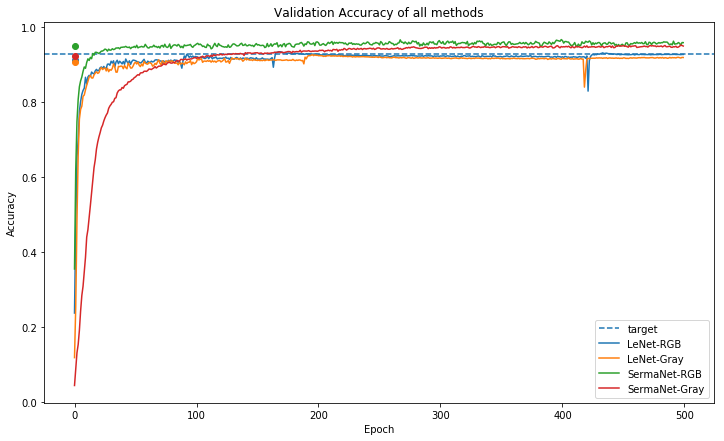

In [30]:
plt.figure(figsize=(12,7))
ax = plt.gca()
plt.axhline(y=0.93, linestyle='--',label='target')
for key, value in res_validation.items():
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(value,label=key,color=color)
    plt.plot(res_testing[key],'o',color=color)
    print(f'{key}:\t Final Validation Accuracy {value[-1]}, Testing Accuracy {res_testing[key][0]}')

plt.title('Validation Accuracy of all methods')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('examples/fig04_model_comparison.png',bbox_inches='tight', pad_inches=0)


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [63]:
# Centralized import of all packages:
import scipy as sp # I like sipy better than numpy
import pandas as pd
import cv2

import pickle

import matplotlib.pylab as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.contrib.layers import flatten

### Load and Output the Images

In [64]:
df_signs = pd.read_csv('traffic_signs/signs.csv')
df_signs

,image,classification
0,im01_4.jpg,4
1,im02_13.jpg,13
2,im03_14.jpeg,14
3,im03a_14.jpg,14
4,im04_34.jpg,34
5,im05_12.jpg,12


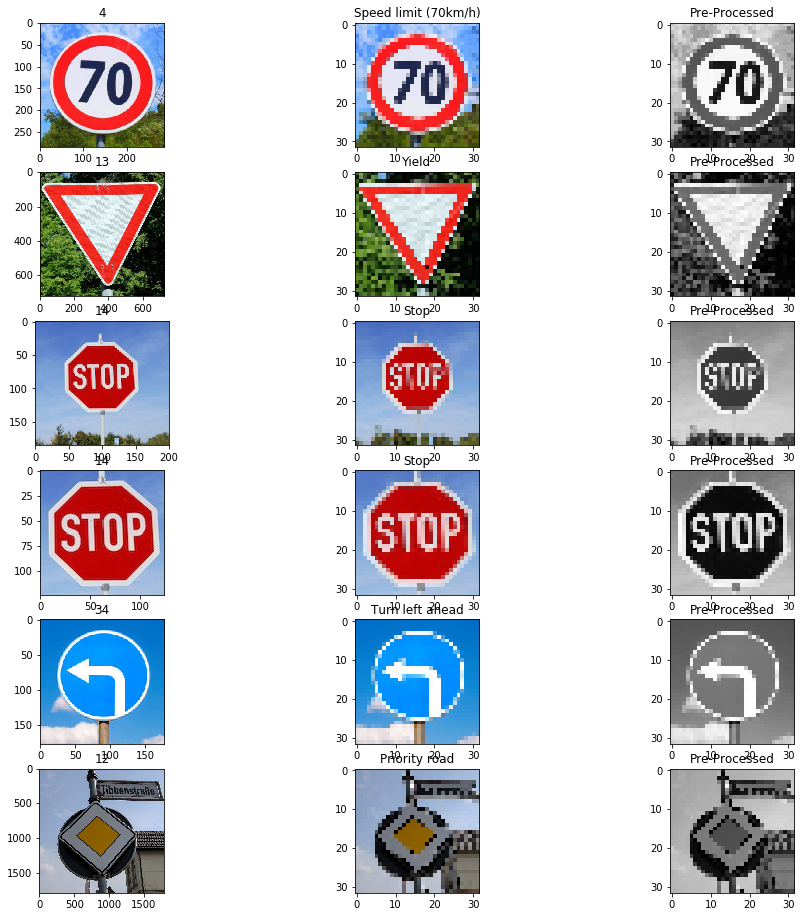

In [65]:
X_real = []
y_real = []

plt.figure(figsize=(16,16))
plt_rows = len(df_signs)
for index, row in df_signs.iterrows():
    image = plt.imread(f'traffic_signs/{row["image"]}')
    plt.subplot(plt_rows,3,(index+1)+2*index)
    plt.imshow(image)
    plt.title(f'{row["classification"]}')
    # Resize
    image = cv2.resize(image, (32, 32))
    plt.subplot(plt_rows,3,(index+1)+2*index+1)
    plt.imshow(image)
    plt.title(f'{df_names.loc[row["classification"]]["SignName"]}')
              
    X_real.append(image)
    y_real.append(row["classification"])
              
X_real = sp.asarray(X_real)
X_real = pipeline(X_real,gray=True)

for index, row in df_signs.iterrows():
    plt.subplot(plt_rows,3,(index+1)+2*index+2)
    plt.imshow(X_real[index,:,:,0]+0.5,cmap='gray')
    plt.title(f'Pre-Processed')
              
plt.savefig('examples/fig05_real_gray.png',bbox_inches='tight', pad_inches=0)

### Predict the Sign Type for Each Image

In [66]:
print("="*60)
print("= Load the best performing mode: SermaNet-Gray")
print("="*60)

#tf.reset_default_graph()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./sermanet-gray.meta')
    saver2.restore(sess, "./sermanet-gray")
    real_accuracy = evaluate(X_real, y_real)
    print("Test Set Accuracy = {:.3f}".format(real_accuracy))

= Load the best performing mode: SermaNet-Gray
INFO:tensorflow:Restoring parameters from ./sermanet-gray
Test Set Accuracy = 0.833


### Analyze Performance

In [35]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [67]:
#x = tf.placeholder(tf.float32, (None, 32, 32, 1))
#logits = SermaNet(x,dim=1)

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./sermanet-gray.meta')
    saver.restore(sess, "./sermanet-gray")
    real_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_real, keep_prob: 1.0})
    real_top_k = sess.run(top_k, feed_dict={x: X_real, keep_prob: 1.0})


INFO:tensorflow:Restoring parameters from ./sermanet-gray


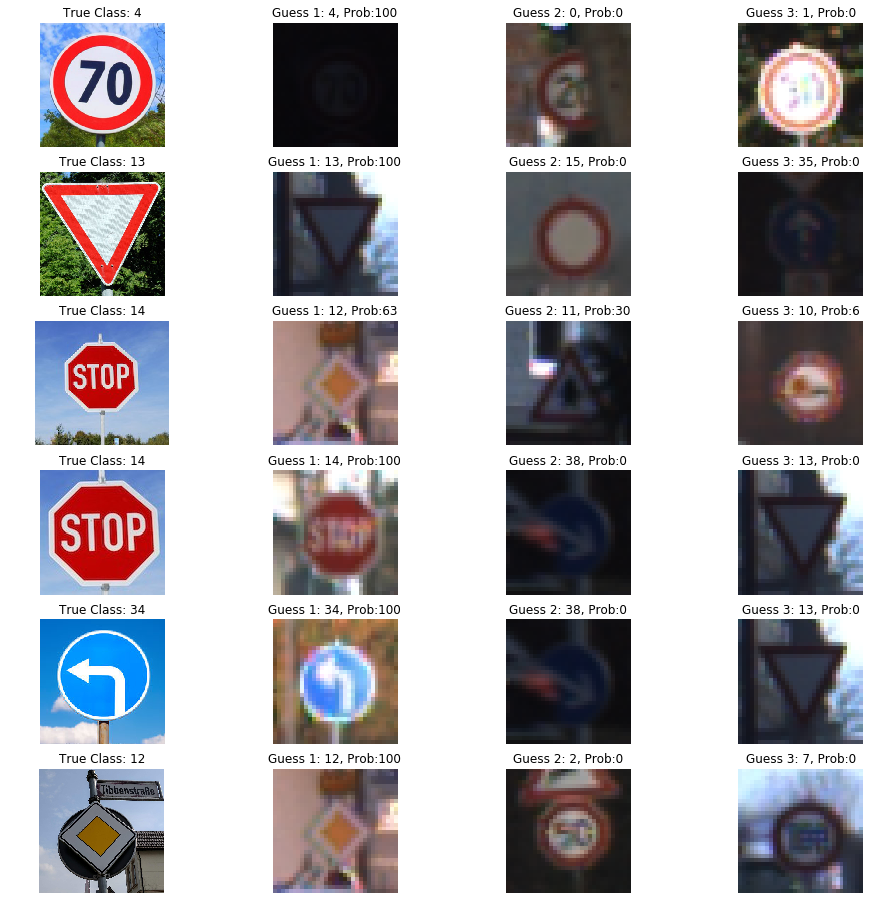

In [68]:
plt.figure(figsize=(16,16))
plt_rows = len(df_signs)
for index, row in df_signs.iterrows():
    
    # Original Image
    image = plt.imread(f'traffic_signs/{row["image"]}')
    plt.subplot(plt_rows,4,(index+1)+3*index)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'True Class: {row["classification"]}')
    
    # Plot 3 top guesses
    for ii in range(0,3):
        prob  = real_top_k[0][index][ii]*100
        guess = real_top_k[1][index][ii]
        index1 = sp.argwhere(y_valid == guess)[0]
        plt.subplot(plt_rows,4,(index+1)+3*index+1+ii)
        plt.imshow(X_valid_orig[index1[0],...])
        plt.axis('off')
        plt.title(f'Guess {ii+1}: {guess}, Prob:{prob:.0f}')
              
plt.savefig('examples/fig06_real_gray_classification.png',bbox_inches='tight', pad_inches=0)

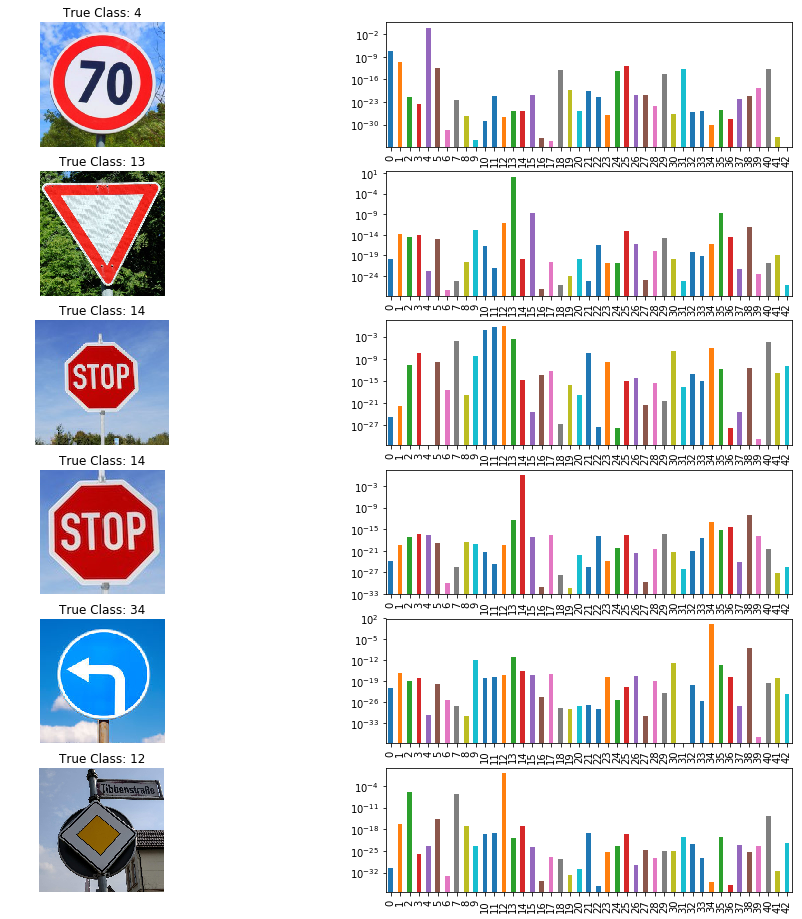

In [69]:
plt.figure(figsize=(16,16))
plt_rows = len(df_signs)

df_softmax = pd.DataFrame(real_softmax_logits)
df_softmax = df_softmax.transpose()

for index, row in df_signs.iterrows():
    
    # Original Image
    image = plt.imread(f'traffic_signs/{row["image"]}')
    plt.subplot(plt_rows,2,(index+1)+1*index)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'True Class: {row["classification"]}')
    
    plt.subplot(plt_rows,2,(index+1)+1*index+1)
    df_softmax[index].plot.bar(y='Propability',x='class',logy=True)
    
plt.savefig('examples/fig07_real_gray_propability.png',bbox_inches='tight', pad_inches=0)    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from ./sermanet-gray


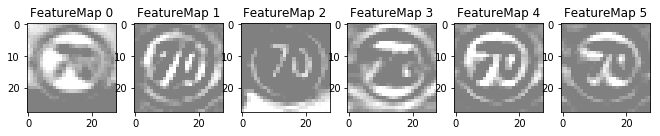

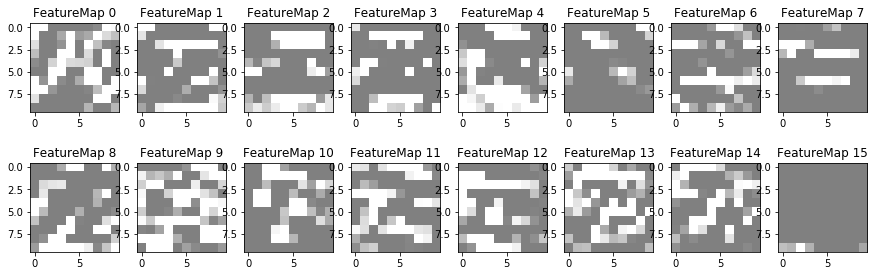

In [70]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

plt.close('all')

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input 
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session= tf.get_default_session(), feed_dict={x: image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")       
            
with tf.Session() as sess:
    #X_final_graph = tf.expand_dims(X_real[0,...], 0)
    X_final_graph = X_real
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver = tf.train.import_meta_graph('./sermanet-gray.meta')
    saver.restore(sess, "./sermanet-gray")
    #print(sess.graph.get_operations())
    conv = sess.graph.get_tensor_by_name('conv01_act:0')
    outputFeatureMap(X_final_graph,conv, activation_min=-1, activation_max=1, plt_num=1)
    
    conv = sess.graph.get_tensor_by_name('conv02_act:0')
    outputFeatureMap(X_final_graph,conv, activation_min=-1, activation_max=1, plt_num=2)
    
    #conv = sess.graph.get_tensor_by_name('W3:0')
    #outputFeatureMap(X_final_graph,conv, activation_min=-1, activation_max=-1, plt_num=3)
    
    #conv = sess.graph.get_tensor_by_name('W4:0')
    #outputFeatureMap(X_final_graph,conv, activation_min=-1, activation_max=-1, plt_num=4)
    
    
    
plt.savefig('examples/fig08_real_gray_featuremaps.png',bbox_inches='tight', pad_inches=0)    
    

---

## Step 3b: Test a Model on New Images (SermaNet-RGB)

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [85]:
# Centralized import of all packages:
import scipy as sp # I like sipy better than numpy
import pandas as pd
import cv2

import pickle

import matplotlib.pylab as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [86]:
df_signs = pd.read_csv('traffic_signs/signs.csv')
df_signs

,image,classification
0,im01_4.jpg,4
1,im02_13.jpg,13
2,im03_14.jpeg,14
3,im03a_14.jpg,14
4,im04_34.jpg,34
5,im05_12.jpg,12


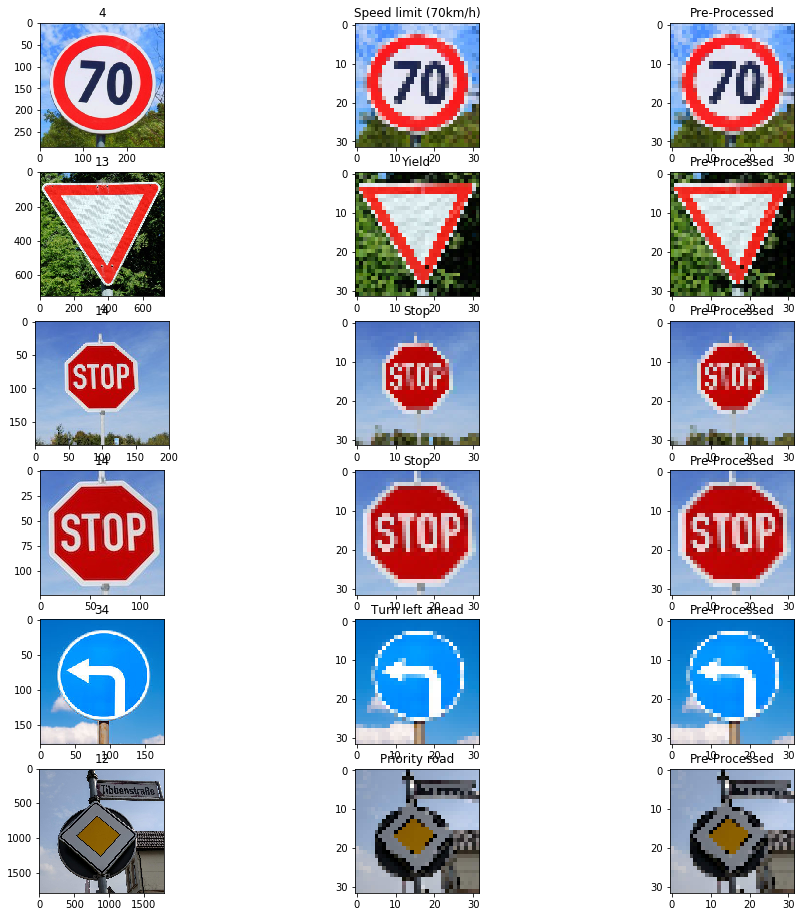

In [87]:
X_real = []
y_real = []

plt.figure(figsize=(16,16))
plt_rows = len(df_signs)
for index, row in df_signs.iterrows():
    image = plt.imread(f'traffic_signs/{row["image"]}')
    plt.subplot(plt_rows,3,(index+1)+2*index)
    plt.imshow(image)
    plt.title(f'{row["classification"]}')
    # Resize
    image = cv2.resize(image, (32, 32))
    plt.subplot(plt_rows,3,(index+1)+2*index+1)
    plt.imshow(image)
    plt.title(f'{df_names.loc[row["classification"]]["SignName"]}')
              
    X_real.append(image)
    y_real.append(row["classification"])
              
X_real = sp.asarray(X_real)
X_real = pipeline(X_real)

for index, row in df_signs.iterrows():
    plt.subplot(plt_rows,3,(index+1)+2*index+2)
    plt.imshow(X_real[index,:,:,:]+0.5)
    plt.title(f'Pre-Processed')
              
plt.savefig('examples/fig09_real_gray_overview.png',bbox_inches='tight', pad_inches=0)


In [88]:
print("="*60)
print("= Load the best performing mode: SermaNet-RBG")
print("="*60)

tf.reset_default_graph()
print("= Initialize Network")
print("-"*60)
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

logits = SermaNet(x,dim=3)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# --------------------------------------------
# Model Evaluation
# --------------------------------------------

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./sermanet-rgb.meta')
    saver2.restore(sess, "./sermanet-rgb")
    real_accuracy = evaluate(X_real, y_real)
    print("Test Set Accuracy = {:.3f}".format(real_accuracy))

= Load the best performing mode: SermaNet-RBG
= Initialize Network
------------------------------------------------------------
Layer 1 shape (conv01): (?, 28, 28, 6)
Layer 2 shape (conv02): (?, 10, 10, 16)
Layer 3 shape (conv03): (?, 1, 1, 400)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
Concatenated Layer: (?, 800)
Output Layer Size (Logits):  (?, 43)
INFO:tensorflow:Restoring parameters from ./sermanet-rgb
Test Set Accuracy = 0.167


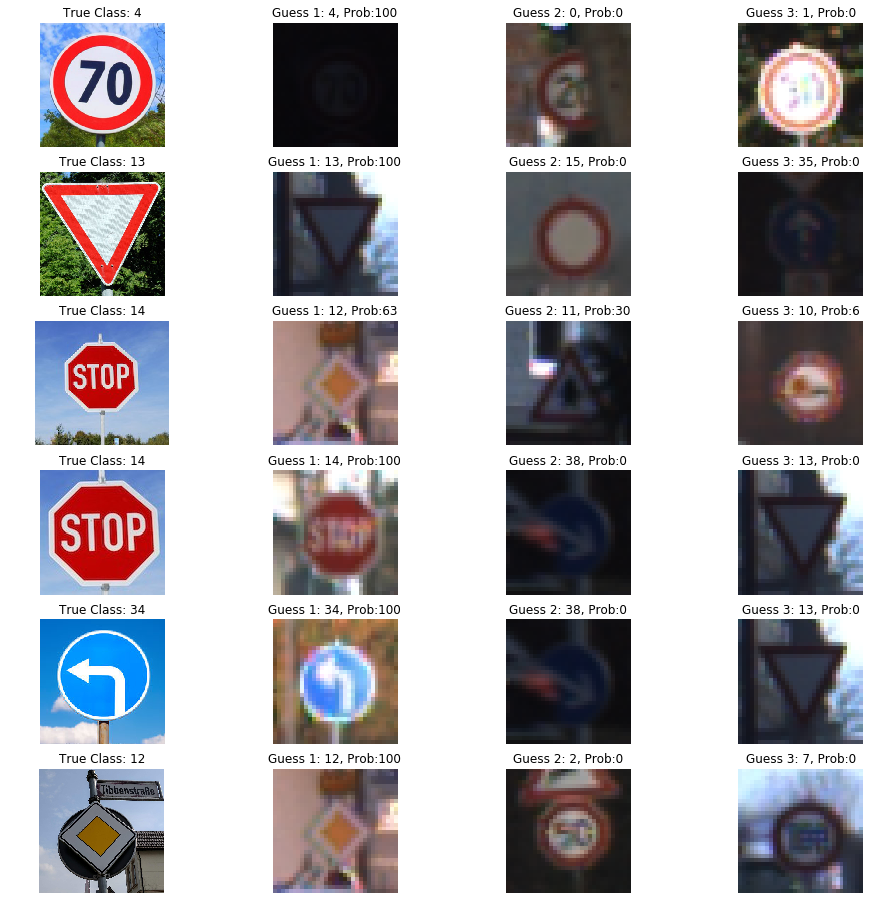

In [89]:
plt.figure(figsize=(16,16))
plt_rows = len(df_signs)
for index, row in df_signs.iterrows():
    
    # Original Image
    image = plt.imread(f'traffic_signs/{row["image"]}')
    plt.subplot(plt_rows,4,(index+1)+3*index)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'True Class: {row["classification"]}')
    
    # Plot 3 top guesses
    for ii in range(0,3):
        prob  = real_top_k[0][index][ii]*100
        guess = real_top_k[1][index][ii]
        index1 = sp.argwhere(y_valid == guess)[0]
        plt.subplot(plt_rows,4,(index+1)+3*index+1+ii)
        plt.imshow(X_valid_orig[index1[0],...])
        plt.axis('off')
        plt.title(f'Guess {ii+1}: {guess}, Prob:{prob:.0f}')
plt.savefig('examples/fig10_real_gray_classification.png',bbox_inches='tight', pad_inches=0)

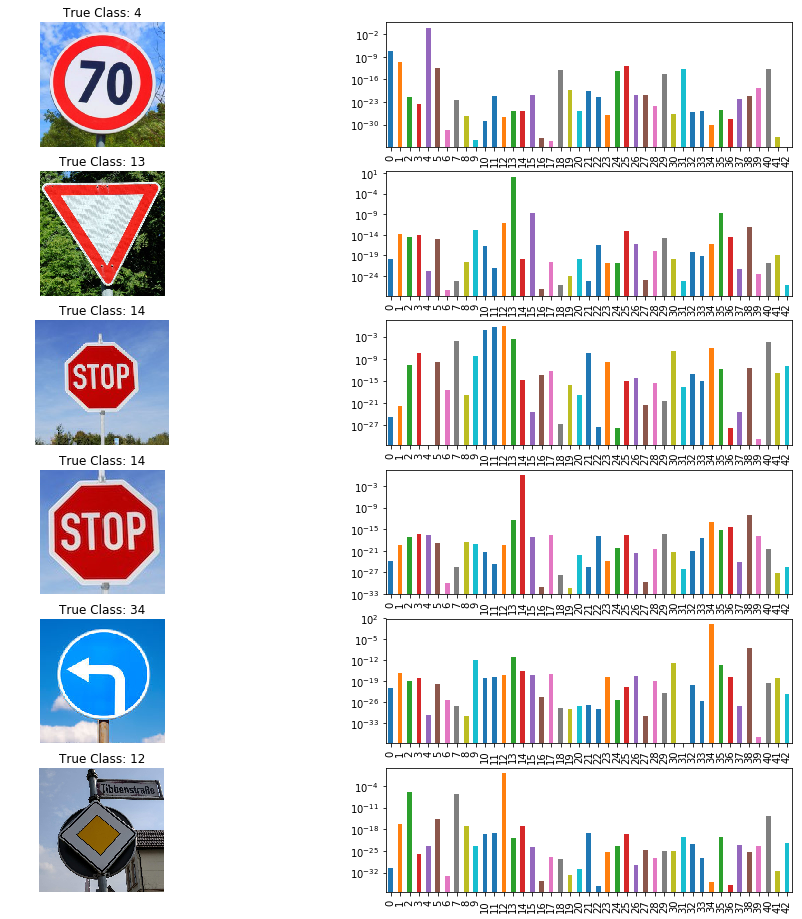

In [90]:
plt.figure(figsize=(16,16))
plt_rows = len(df_signs)

df_softmax = pd.DataFrame(real_softmax_logits)
df_softmax = df_softmax.transpose()

for index, row in df_signs.iterrows():
    
    # Original Image
    image = plt.imread(f'traffic_signs/{row["image"]}')
    plt.subplot(plt_rows,2,(index+1)+1*index)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'True Class: {row["classification"]}')
    
    plt.subplot(plt_rows,2,(index+1)+1*index+1)
    df_softmax[index].plot.bar(y='Propability',x='class',logy=True)
    
 plt.savefig('examples/fig11_real_gray_propability.png',bbox_inches='tight', pad_inches=0)   

In [91]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

plt.close('all')

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input 
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session= tf.get_default_session(), feed_dict={x: image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")       
            
with tf.Session() as sess:
    #X_final_graph = tf.expand_dims(X_real[0,...], 0)
    X_final_graph = X_real
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver = tf.train.import_meta_graph('./sermanet-rgb.meta')
    saver.restore(sess, "./sermanet-rgb")
    #print(sess.graph.get_operations())
    conv = sess.graph.get_tensor_by_name('conv01_act:0')
    outputFeatureMap(X_final_graph,conv, activation_min=-1, activation_max=1, plt_num=1)
    
    conv = sess.graph.get_tensor_by_name('conv02_act:0')
    outputFeatureMap(X_final_graph,conv, activation_min=-1, activation_max=1, plt_num=2)
    
    #conv = sess.graph.get_tensor_by_name('W3:0')
    #outputFeatureMap(X_final_graph,conv, activation_min=-1, activation_max=-1, plt_num=3)
    
    #conv = sess.graph.get_tensor_by_name('W4:0')
    #outputFeatureMap(X_final_graph,conv, activation_min=-1, activation_max=-1, plt_num=4)
    
    
    
    
    

INFO:tensorflow:Restoring parameters from ./sermanet-rgb


FailedPreconditionError: Attempting to use uninitialized value W1
	 [[node W1/read (defined at <ipython-input-18-f07090a6911d>:18)  = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](W1)]]
	 [[{{node conv01_act/_55}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_19_conv01_act", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'W1/read', defined at:
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/asyncio/base_events.py", line 427, in run_forever
    self._run_once()
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/asyncio/base_events.py", line 1440, in _run_once
    handle._run()
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tornado/gen.py", line 346, in wrapper
    runner = Runner(result, future, yielded)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tornado/gen.py", line 1080, in __init__
    self.run()
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-88-c57b11e3710d>", line 14, in <module>
    logits = SermaNet(x,dim=3)
  File "<ipython-input-18-f07090a6911d>", line 18, in SermaNet
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, dim, 6), mean = mu, stddev = sigma), name="W1")
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 183, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 146, in _variable_v1_call
    aggregation=aggregation)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 125, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2444, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 187, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1329, in __init__
    constraint=constraint)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1491, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 81, in identity
    return gen_array_ops.identity(input, name=name)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3454, in identity
    "Identity", input=input, name=name)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/andput/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value W1
	 [[node W1/read (defined at <ipython-input-18-f07090a6911d>:18)  = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](W1)]]
	 [[{{node conv01_act/_55}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_19_conv01_act", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
